4. Look for patterns in referrals and re-referrals on the basis of the following:
    - Age
    - Referral source
    - Socioeconomic status (County SES)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
clean_data=pd.read_csv('../../data/teis_final_data.csv')

In [5]:
clean_data

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,DCS,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Health Care Provider,2022
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,2022


In [6]:
clean_data.columns

Index(['Child ID', 'Notification Date', 'Fiscal Year', 'Notification Month',
       'Tenn Region', 'Fiscal Year.1', 'third_DOB', 'Late Referral', 'Qtr',
       'POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active',
       'Service Coordinator', 'Parent Consent', 'Initial Eligibility',
       'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP',
       'Exit Reason', 'Exit Date', 'Referral Source Type Name', 'Year'],
      dtype='object')

In [7]:
clean_data['Notification Date']=pd.to_datetime(clean_data['Notification Date'])
clean_data['DOB']=pd.to_datetime(clean_data['DOB'])

In [8]:
clean_data.dtypes

Child ID                              int64
Notification Date            datetime64[ns]
Fiscal Year                          object
Notification Month                   object
Tenn Region                          object
Fiscal Year.1                       float64
third_DOB                            object
Late Referral                       float64
Qtr                                 float64
POE                                  object
DOB                          datetime64[ns]
County Name                          object
County SES                           object
Child Phase                          object
Active                               object
Service Coordinator                  object
Parent Consent                       object
Initial Eligibility                  object
Initial Eligibility Date             object
Initial IFSP Date                    object
Latest IFSP                          object
Exit Reason                          object
Exit Date                       

In [9]:
clean_data = clean_data.rename(columns = {'Notification Date':'notif_date'})
clean_data.columns

Index(['Child ID', 'notif_date', 'Fiscal Year', 'Notification Month',
       'Tenn Region', 'Fiscal Year.1', 'third_DOB', 'Late Referral', 'Qtr',
       'POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active',
       'Service Coordinator', 'Parent Consent', 'Initial Eligibility',
       'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP',
       'Exit Reason', 'Exit Date', 'Referral Source Type Name', 'Year'],
      dtype='object')

In [87]:
#dt.days extracts only the days as an int from the result of notif_date-DOB which is actually a timedelta which under the hood is in like millions of seconds
clean_data = clean_data[(((clean_data['notif_date']-clean_data['DOB']).dt.days) > 0) & (((clean_data['notif_date']-clean_data['DOB']).dt.days) < 1095)]
clean_data

,Child ID,notif_date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016
5,353900,2016-09-29,2016-2017,Sep,Western,2016.0,2016-10-09,1.0,1.0,MD,...,JoAnn Hinkle-DA,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-29,Parent,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Health Care Provider,2022
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,2022


In [95]:
clean_data['kids_age'] = (clean_data['notif_date'] - clean_data['DOB'])
clean_data['kids_age'] = clean_data['kids_age'].dt.days
clean_data.dtypes

Child ID                              int64
notif_date                   datetime64[ns]
Fiscal Year                          object
Notification Month                   object
Tenn Region                          object
Fiscal Year.1                       float64
third_DOB                            object
Late Referral                       float64
Qtr                                 float64
POE                                  object
DOB                          datetime64[ns]
County Name                          object
County SES                           object
Child Phase                          object
Active                               object
Service Coordinator                  object
Parent Consent                       object
Initial Eligibility                  object
Initial Eligibility Date             object
Initial IFSP Date                    object
Latest IFSP                          object
Exit Reason                          object
Exit Date                       

In [89]:
#keep is set to first, which effectively discards originals and keeps only duplicates
re_referrals = clean_data[clean_data.duplicated(subset='Child ID', keep='first')]
re_referrals

,Child ID,notif_date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year,kids_age
25,360966,2017-01-12,2016-2017,Jan,Eastern,2016.0,2017-01-18,1.0,3.0,ET,...,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2017-01-17,DCS,2017,1090
27,361021,2016-11-29,2016-2017,Nov,Eastern,2016.0,2017-02-17,1.0,2.0,ET,...,2016-11-29,Eligible,12/5/2016,12/21/2016,1/5/2017,618 - Part B eligible,2017-02-16,Family and Friends,2016,1016
29,361038,2016-08-26,2016-2017,Aug,Middle,2016.0,2016-12-25,NaN,1.0,GN,...,2016-09-02,Ineligible,4/30/2014,NaN,NaN,Unable to contact,NaN,DCS,2016,975
31,361040,2016-10-28,2016-2017,Oct,Eastern,2016.0,2017-01-22,1.0,2.0,ET,...,2016-10-28,Eligible,4/2/2014,4/17/2014,11/2/2016,618 - Part B eligibility not determined,2017-01-21,Parent,2016,1010
47,363098,2016-09-29,2016-2017,Sep,Middle,2016.0,2017-04-07,NaN,1.0,SC,...,2016-10-04,Eligible,8/12/2014,8/22/2014,10/4/2016,NaN,NaN,DCS,2016,906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113471,529200,2022-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parent,2022,61
113561,529303,2022-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parent,2022,843
113605,529365,2022-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parent,2022,839
113657,529416,2022-05-26,2021-2022,May,Middle,2021.0,2022-10-09,NaN,4.0,GN,...,NaN,NaN,NaN,NaN,NaN,Parent decline,NaN,Dept. of Health,2022,960


In [100]:
clean_data.describe()

,Child ID,Fiscal Year.1,Late Referral,Qtr,Year,kids_age
count,115473.000000,113209.000000,2815.0,113209.000000,115473.000000,115473.000000
mean,464304.753094,2018.593990,1.0,2.502875,2019.157673,468.129762
std,37683.671736,1.677521,0.0,1.118813,1.765944,319.859844
min,350065.000000,2016.000000,1.0,1.000000,2016.000000,1.000000
25%,430013.000000,2017.000000,1.0,1.000000,2018.000000,138.000000
50%,465866.000000,2019.000000,1.0,3.000000,2019.000000,503.000000
75%,496014.000000,2020.000000,1.0,3.000000,2021.000000,742.000000
max,531596.000000,2021.000000,1.0,4.000000,2022.000000,1094.000000


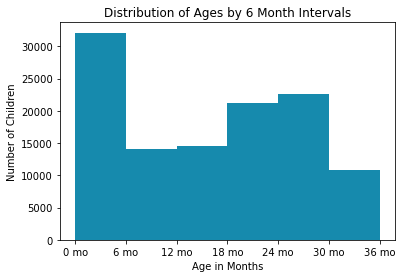

In [102]:
plt.hist(clean_data.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095], color = '#168AAD')
plt.title('Distribution of Ages by 6 Month Intervals')
plt.xlabel('Age in Months')
plt.ylabel('Number of Children')
plt.xticks(ticks=[0, 182, 365, 547, 730, 912, 1095], labels=['0 mo', '6 mo', '12 mo', '18 mo', '24 mo', '30 mo', '36 mo'])
plt.savefig('Distribution of Ages by 6 Month Intervals', transparent=True)

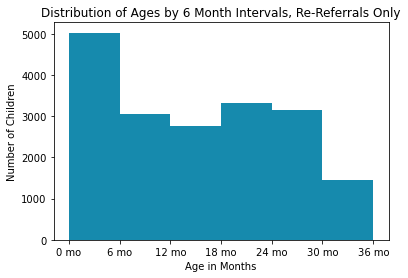

In [103]:
plt.hist(re_referrals.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095], color = '#168AAD')
plt.title('Distribution of Ages by 6 Month Intervals, Re-Referrals Only')
plt.xlabel('Age in Months')
plt.ylabel('Number of Children')
plt.xticks(ticks=[0, 182, 365, 547, 730, 912, 1095], labels=['0 mo', '6 mo', '12 mo', '18 mo', '24 mo', '30 mo', '36 mo'])
plt.savefig('Distribution of Ages by 6 Month Intervals, Re-Referrals Only', transparent=True)

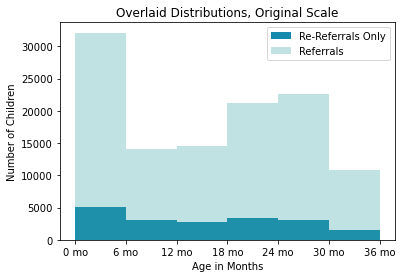

In [104]:
plt.hist(re_referrals.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095], color = '#168AAD', label = 'Re-Referrals Only')
plt.hist(clean_data.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095], color = '#34A0A4', label = 'Referrals', alpha=0.3)
plt.title('Overlaid Distributions, Original Scale')
plt.xlabel('Age in Months')
plt.ylabel('Number of Children')
plt.xticks(ticks=[0, 182, 365, 547, 730, 912, 1095], labels=['0 mo', '6 mo', '12 mo', '18 mo', '24 mo', '30 mo', '36 mo'])
plt.legend()
plt.savefig('Overlaid Distributions, Original Scale', transparent=True)

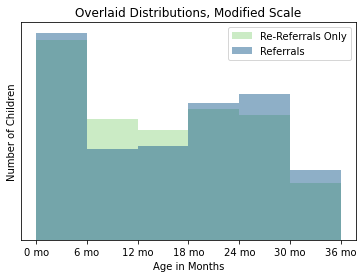

In [105]:
plt.hist(re_referrals.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095], color = '#99D98C', label = 'Re-Referrals Only', density=True, alpha=0.5)
plt.hist(clean_data.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095], color = '#1E6091', label = 'Referrals', density=True, alpha=0.5)
plt.title('Overlaid Distributions, Modified Scale')
plt.xlabel('Age in Months')
plt.ylabel('Number of Children')
plt.yticks(ticks=[])
plt.xticks(ticks=[0, 182, 365, 547, 730, 912, 1095], labels=['0 mo', '6 mo', '12 mo', '18 mo', '24 mo', '30 mo', '36 mo'])
plt.legend()
plt.savefig('Overlaid Distributions, Modified Scale', transparent=True)